In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

path = Path("/home/antiez/code/projet_ml_advanced_am_mv_rh/data")

df_c = pd.read_csv(path/"customers.csv", delimiter=";")
df_i = pd.read_csv(path/"indicators.csv", delimiter=";")

print(f"Same size ? >> {len(df_c)==len(df_i)}")
print(f"Same amount of unique client id ? >> {len(df_c['ID_CLIENT'].unique()) == len(df_i['ID_CLIENT'].unique())}")
print(f"Only unique ID ? >> {len(df_c)==len(df_c['ID_CLIENT'].unique())}")

Same size ? >> True
Same amount of unique client id ? >> True
Only unique ID ? >> True


In [3]:
df = df_c.merge(df_i,on="ID_CLIENT")
df["DATE_ENTREE"]=pd.to_datetime(df["DATE_ENTREE"]) 
df

ID_CLIENT DATE_ENTREE               NOM       PAYS SEXE  AGE  \
0      15688172  2015-01-01               Tai    Espagne    H   40   
1      15787258  2014-05-01              Ross    Espagne    F   29   
2      15791700  2018-01-01  Ugochukwutubelum  Allemagne    H   47   
3      15569438  2010-03-01               Mai  Allemagne    H   36   
4      15778947  2017-01-01          Sullivan     France    H   36   
...         ...         ...               ...        ...  ...  ...   
9945   15711457  2013-01-01              Herz     France    F   28   
9946   15712403  2019-05-01          McMillan     France    F   61   
9947   15576263  2015-04-01          Clements     France    F   22   
9948   15745843  2016-02-01            Kinlaw    Espagne    F   31   
9949   15753229  2011-04-01          Genovese     France    H   29   

     MEMBRE_ACTIF    BALANCE  NB_PRODUITS CARTE_CREDIT    SALAIRE  \
0              No       0.00            2          Yes   88947.56   
1              No       0.00           16          Yes        NaN   
2             Yes  118079.47            4          Yes  143007.49   
3              No  106702.94            2           No  198313.69   
4             Yes       0.00            2          Yes    8742.91   
...           ...        ...          ...          ...        ...   
9945          Yes  124540.28            1           No  188850.89   
9946           No       0.00            1          Yes   61108.56   
9947           No       0.00            1          Yes   22303.17   
9948          Yes       0.00            2          Yes  136610.02   
9949          Yes  127414.55            1          Yes  134459.12   

      SCORE_CREDIT CHURN  
0            677.0    No  
1              NaN    No  
2            773.0   Yes  
3            607.0    No  
4            628.0    No  
...            ...   ...  
9945         755.0    No  
9946         589.0   Yes  
9947         759.0    No  
9948         689.0    No  
9949         802.0    No  

[9950 rows x 13 columns]

In [4]:
numeric_features = ['AGE', 'BALANCE', "SCORE_CREDIT","SALAIRE" ]
categorical_features = ['PAYS', 'SEXE', "MEMBRE_ACTIF", 'NB_PRODUITS', "CARTE_CREDIT"]


def plot_boxplot_comparisons(df, hue="CHURN"):
    pal = sns.diverging_palette(220, 20, n=3)
    figsize = (6*len(categorical_features), 5*len(numeric_features))
    fig, axs = plt.subplots(nrows=len(categorical_features), ncols=len(numeric_features), figsize=figsize)
    for r, cat in enumerate(categorical_features):
        for c , num in enumerate(numeric_features):
            sns.boxplot(x=cat, y=num, hue=hue, data=df, ax=axs[r][c], width=0.5, palette=pal)
        
def plot_violinplot_comparisons(df, hue="CHURN"):
    figsize = (6*len(categorical_features), 5*len(numeric_features))
    fig, axs = plt.subplots(nrows=len(categorical_features), ncols=len(numeric_features), figsize=figsize)
    for r, cat in enumerate(categorical_features):
        for c , num in enumerate(numeric_features):
            sns.violinplot(x=cat, y=num, hue=hue, data=df, ax=axs[r][c], split=True,scale="count", inner="points", palette="Set2" )

In [ ]:
import plotly.express as px
def plot_parcoords(df, hue="CHURN")
    fig = px.parallel_coordinates(df, color= df[hue], dimensions=[col for col in df.columns if col!=hue]))
    fig.show()
plot_parcoords(df)

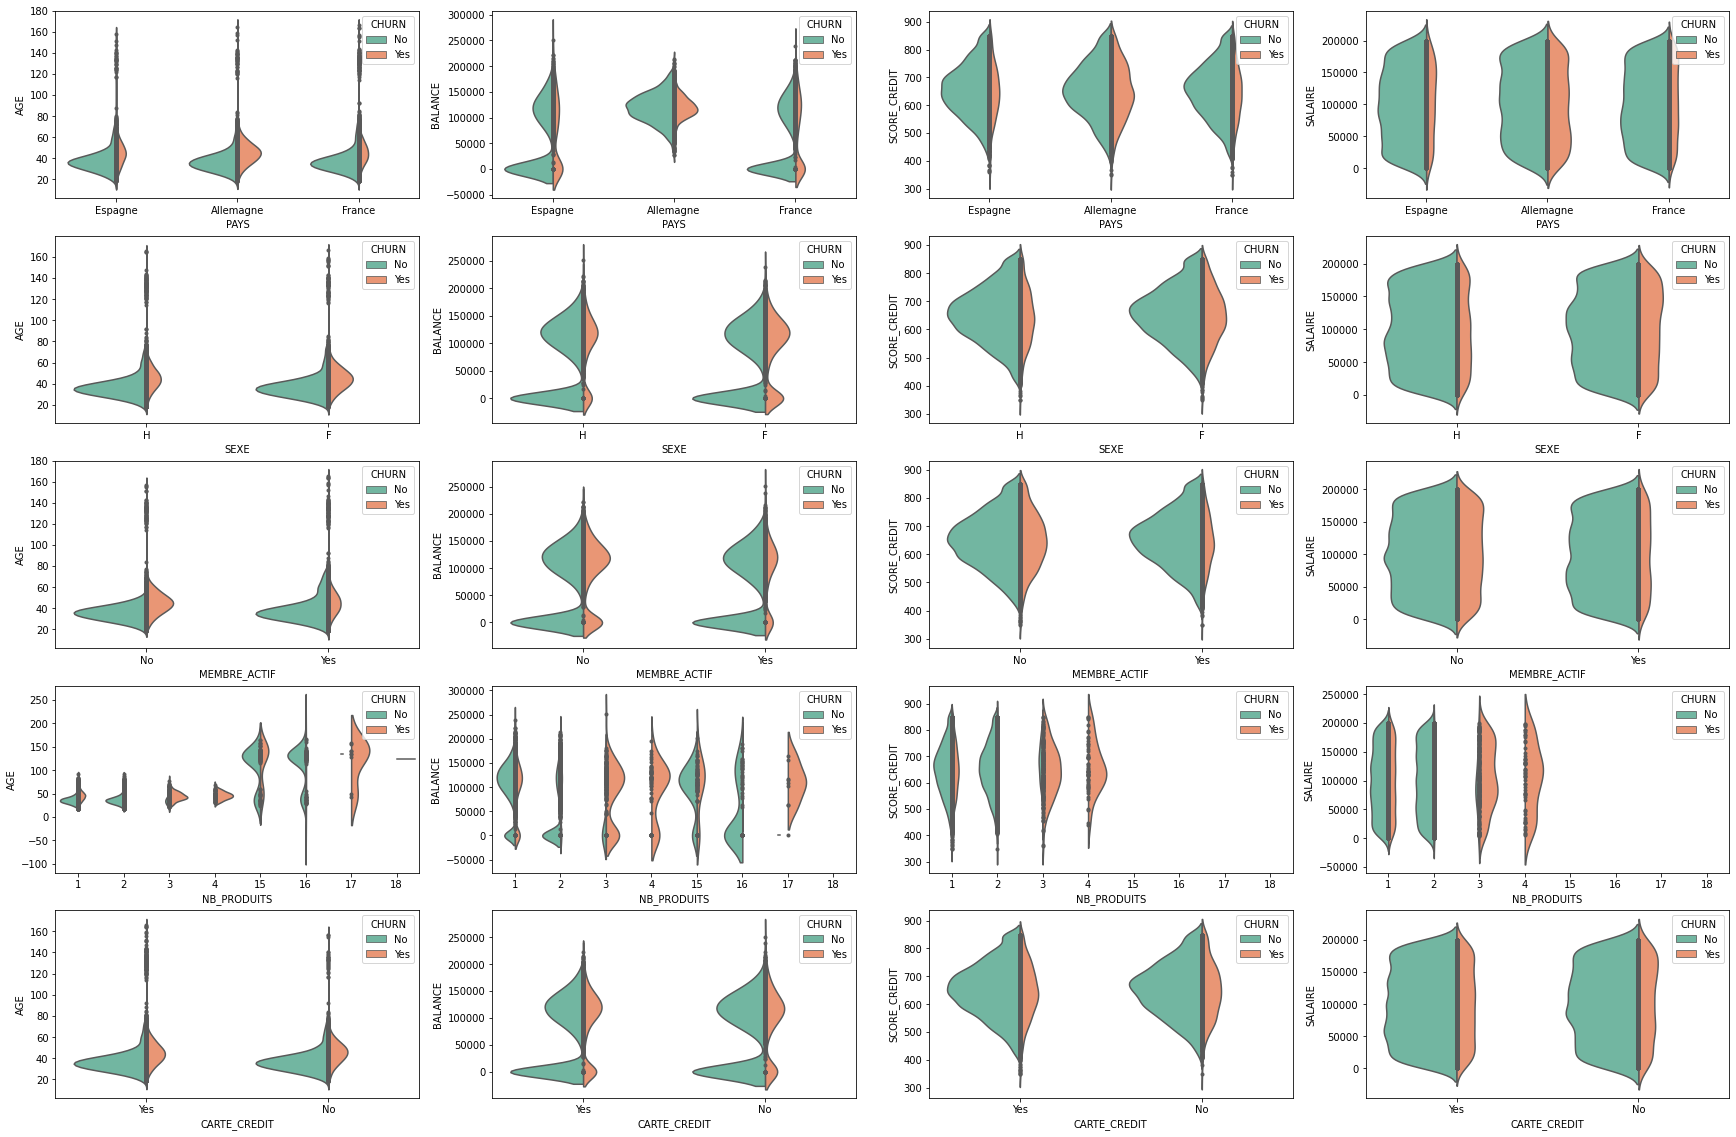

In [5]:
df_pair_plot_raw=df.drop(["NOM", "ID_CLIENT"], axis=1)
#sns.pairplot(df_pair_plot_raw, hue="CHURN")
#plot_boxplot_comparisons(df_pair_plot_raw)
plot_violinplot_comparisons(df_pair_plot_raw)

Rows deleted : 559


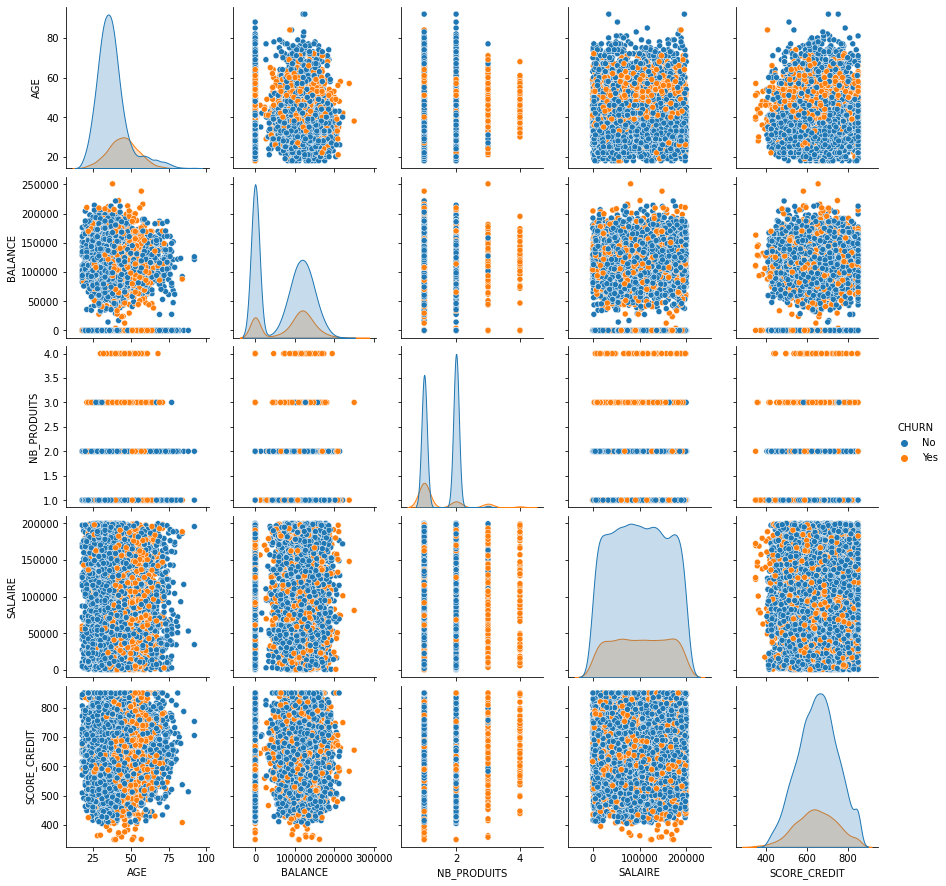

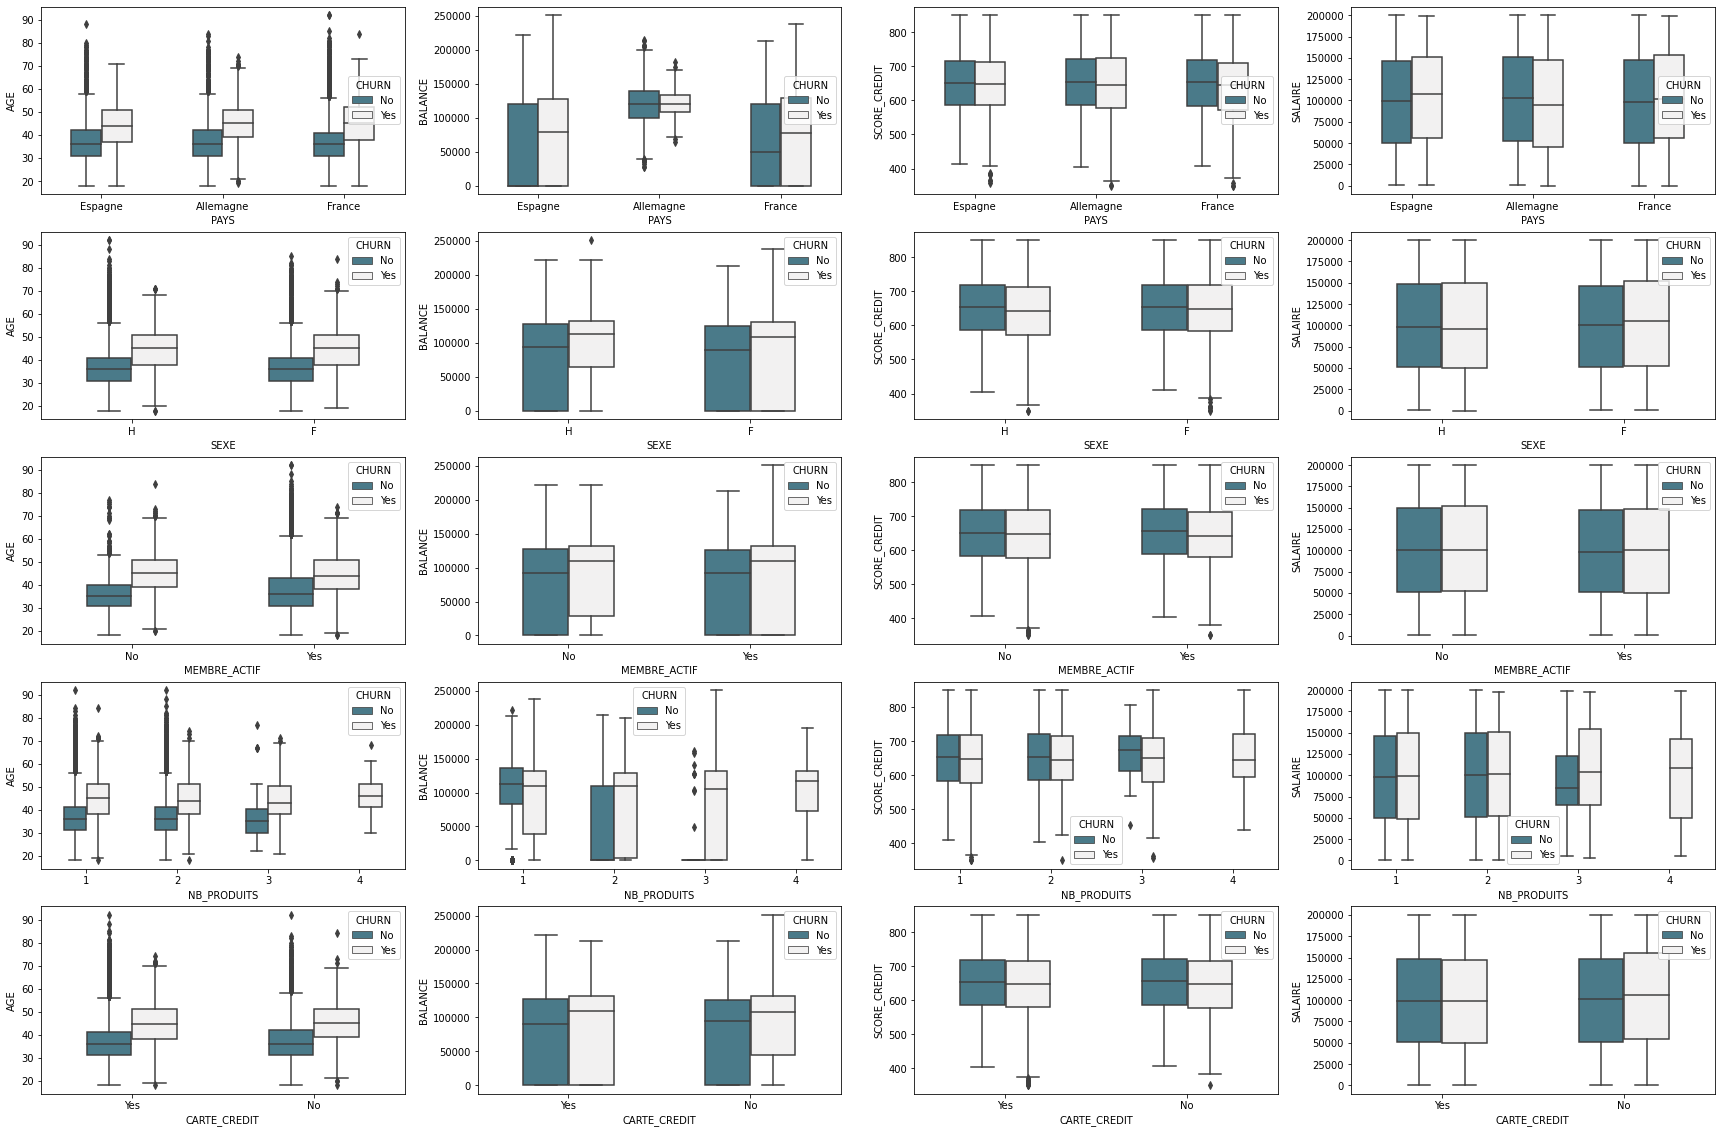

In [6]:
df_pair_plot = df_pair_plot_raw.dropna()
print(f"Rows deleted : {len(df)-len(df_pair_plot)}")
sns.pairplot(df_pair_plot, hue="CHURN")
plot_boxplot_comparisons(df_pair_plot)

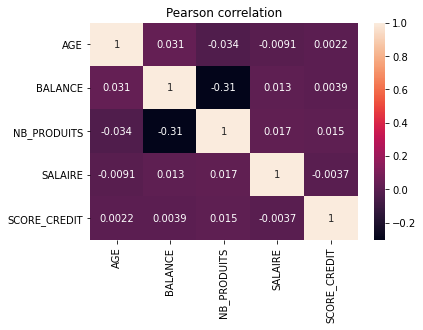

In [7]:
spearman_corr=df_pair_plot.corr(method="spearman")
pearson_corr=df_pair_plot.corr(method="pearson")
sns.heatmap(spearman_corr, annot=True).set_title("Spearman correlation")
plt.show()
sns.heatmap(pearson_corr, annot=True).set_title("Pearson correlation")
plt.show()

DATE_ENTREE


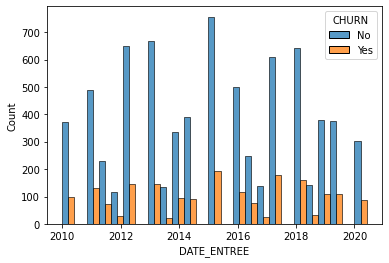

PAYS


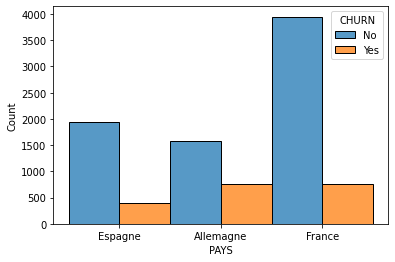

SEXE


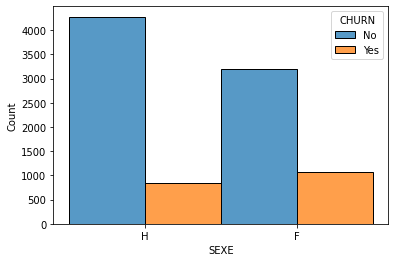

AGE


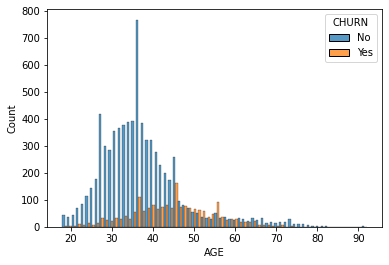

MEMBRE_ACTIF


BALANCE


NB_PRODUITS


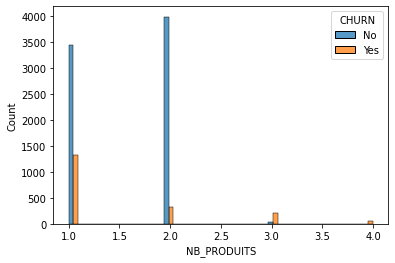

CARTE_CREDIT


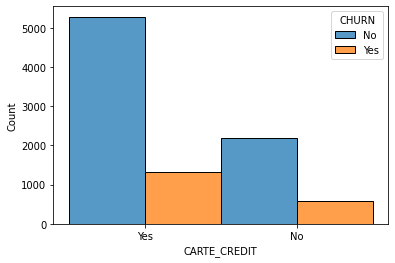

SALAIRE


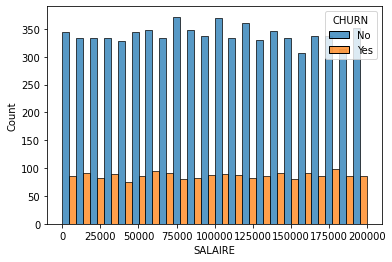

SCORE_CREDIT


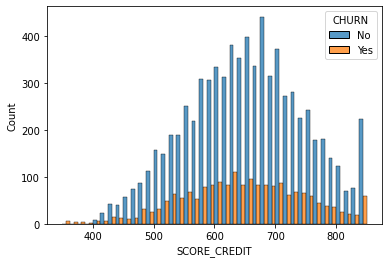

In [8]:
for col in df_pair_plot.columns:
    if col != "CHURN":
        print(col)
        #sns.displot(df_pair_plot, x = col, hue="CHURN", multiple='stack')
        sns.histplot(df_pair_plot, x = col, hue="CHURN",multiple="dodge")
        plt.show()

Effets visibles de :
- L'age
- Le genre
- Nombre de produits
- Membre Actif/Inactifs
- Pays

## Test Independance of each column with Churn

source: https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

In [9]:
import scipy.stats as stats

for col in df_pair_plot.columns:
    if col != "CHURN":
        crosstab = pd.crosstab(df_pair_plot[col], df_pair_plot["CHURN"])
        _, p_value, *_ = stats.chi2_contingency(crosstab)
        print(f" ------ Independance of {col} ------")
        print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")
        

 ------ Independance of DATE_ENTREE ------
P-Value: 0.4210678352547224 | Rejection of independance: False
 ------ Independance of PAYS ------
P-Value: 2.0157342952056443e-59 | Rejection of independance: True
 ------ Independance of SEXE ------
P-Value: 4.0698544351466556e-24 | Rejection of independance: True
 ------ Independance of AGE ------
P-Value: 1.381828814522706e-269 | Rejection of independance: True
 ------ Independance of MEMBRE_ACTIF ------
P-Value: 1.6379636006684972e-51 | Rejection of independance: True
 ------ Independance of BALANCE ------
P-Value: 9.559736169101624e-15 | Rejection of independance: True
 ------ Independance of NB_PRODUITS ------
P-Value: 5.54198102475653e-303 | Rejection of independance: True
 ------ Independance of CARTE_CREDIT ------
P-Value: 0.39340049812123046 | Rejection of independance: False
 ------ Independance of SALAIRE ------
P-Value: 0.492237489016714 | Rejection of independance: False
 ------ Independance of SCORE_CREDIT ------
P-Value: 0.040

In [10]:
# Test only the effect of year
crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.year, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Year ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.month, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Month ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.day, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Day ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.weekday, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Weekday ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


 ------ Independance of Year ------
P-Value: 0.23941352550775385 | Rejection of independance: False
 ------ Independance of Month ------
P-Value: 0.8502279928664216 | Rejection of independance: False
 ------ Independance of Day ------
P-Value: 1.0 | Rejection of independance: False
 ------ Independance of Weekday ------
P-Value: 0.34473561424164695 | Rejection of independance: False


### Select relevant features

In [11]:
df_poc = df[["CHURN","PAYS","SEXE", "AGE", "MEMBRE_ACTIF" , "BALANCE", "NB_PRODUITS", "SCORE_CREDIT"]].dropna()
df_poc

CHURN       PAYS SEXE  AGE MEMBRE_ACTIF    BALANCE  NB_PRODUITS  \
0       No    Espagne    H   40           No       0.00            2   
2      Yes  Allemagne    H   47          Yes  118079.47            4   
3       No  Allemagne    H   36           No  106702.94            2   
4       No     France    H   36          Yes       0.00            2   
5       No    Espagne    F   55          Yes  133676.65            1   
...    ...        ...  ...  ...          ...        ...          ...   
9945    No     France    F   28          Yes  124540.28            1   
9946   Yes     France    F   61           No       0.00            1   
9947    No     France    F   22           No       0.00            1   
9948    No    Espagne    F   31          Yes       0.00            2   
9949    No     France    H   29          Yes  127414.55            1   

      SCORE_CREDIT  
0            677.0  
2            773.0  
3            607.0  
4            628.0  
5            645.0  
...            ...  
9945         755.0  
9946         589.0  
9947         759.0  
9948         689.0  
9949         802.0  

[9391 rows x 8 columns]

### Downsampling to rebalance classes
Faire que pour la base Test

In [12]:
def resample(df_poc):
    cardinals = df_poc["CHURN"].value_counts().to_dict()
    print(cardinals)
    df_yes_sampled = df_poc[df_poc["CHURN"]==0].sample(n=cardinals[1])
    df_resampled = pd.concat([df_yes_sampled, df_poc[df_poc["CHURN"]==1]])
    df_resampled['CHURN'].value_counts()
    return df_resampled

### Preprocess data

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['AGE', 'BALANCE', "SCORE_CREDIT", ]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['PAYS', 'SEXE', "MEMBRE_ACTIF", 'NB_PRODUITS']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Train model

In [14]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df_used = df_poc

X = df_used.drop("CHURN", axis=1)
y = df_used["CHURN"].replace(to_replace=["Yes", "No"], value=[1,0])


clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', svm.SVC())])
#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', MLPClassifier(hidden_layer_sizes= (200,) ,activation='relu', solver='adam',learning_rate='invscaling', max_iter=200))])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#Resampling of datasets
X_resampled= resample(pd.concat([X_train, y_train], axis=1))
y_train = X_resampled['CHURN']
X_train = X_resampled.drop(["CHURN"], axis=1)

clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(f"model accuracy: {round(score*100,1)}%")

{0: 5017, 1: 1274}
model accuracy: 78.3%


In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
target_names = ['Not Churned', 'churned']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.93      0.79      0.85      2463
     churned       0.48      0.76      0.59       637

    accuracy                           0.78      3100
   macro avg       0.71      0.78      0.72      3100
weighted avg       0.84      0.78      0.80      3100



Observations : Déséquilibre de classe significatif entre les classes
Recall et F1 score très faible

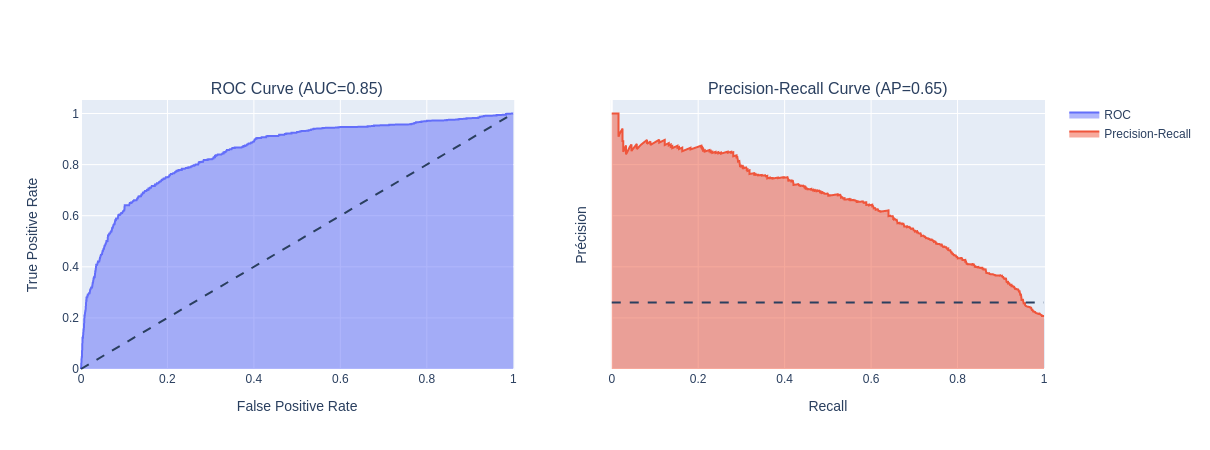

In [55]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from plotly.subplots import make_subplots

def plot_roc_pr_report(y_test, y_score):
    fpr_roc, tpr_roc, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    fig = make_subplots(rows=1, cols=2, subplot_titles=(
        f'ROC Curve (AUC={round(auc(fpr_roc, tpr_roc),2)})',
        f'Precision-Recall Curve (AP={round(average_precision,2)})'),
                       shared_xaxes=True, shared_yaxes=True)

    row = 1
    # ROC subplot
    col = 1
    fig.add_trace(go.Scatter(x=fpr_roc, y=tpr_roc,fill='tozeroy', name="ROC"), row=row, col=col,
    )
    fig.update_xaxes(title_text="False Positive Rate", row=row, col=col, constrain='domain')
    fig.update_yaxes(title_text="True Positive Rate", row=row, col=col, scaleanchor="x", scaleratio=1)
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1,row=row, col=col,
    )

    # Precision-Recall subplot
    label_counts = y_test.value_counts().to_dict()
    positives_ratio = round(label_counts[1]/label_counts[0],2)
    col=2
    fig.add_trace(go.Scatter(x=recall, y=precision,fill='tozeroy', name="Precision-Recall"), row=row, col=col,
    )
    fig.update_xaxes(title_text="Recall", row=row, col=col, constrain='domain')
    fig.update_yaxes(title_text="Précision", row=row, col=col, scaleanchor="x", scaleratio=1)
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=positives_ratio, y1=positives_ratio, row=row, col=col,
    )
    

    fig.show()
plot_roc_pr_report(y_test, y_score)

### Ajouter la precision /recall curve

### Focus on Errors
In the standard model
- 379 errors when 0 should be predicted but 1 has been predicted 
- 64 errors when 1 should be predicted but 0 has been predicted

### Errors interpretation:
- `-1` should be 0 (No, Not churned) predicted 1. **Faux positifs** 
- `1` should be 1 (Yes, Churned) predicted 0. **Faux négatifs**
- `0` Good prediction. 

-> We want to decrease `-1`

In [19]:
errors = y_test.to_numpy() - y_pred

In [20]:
X_test["ERRORS"] = errors
X_test["ERRORS"].value_counts()

<ipython-input-20-fca2d81946a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 0    2427
-1     523
 1     150
Name: ERRORS, dtype: int64

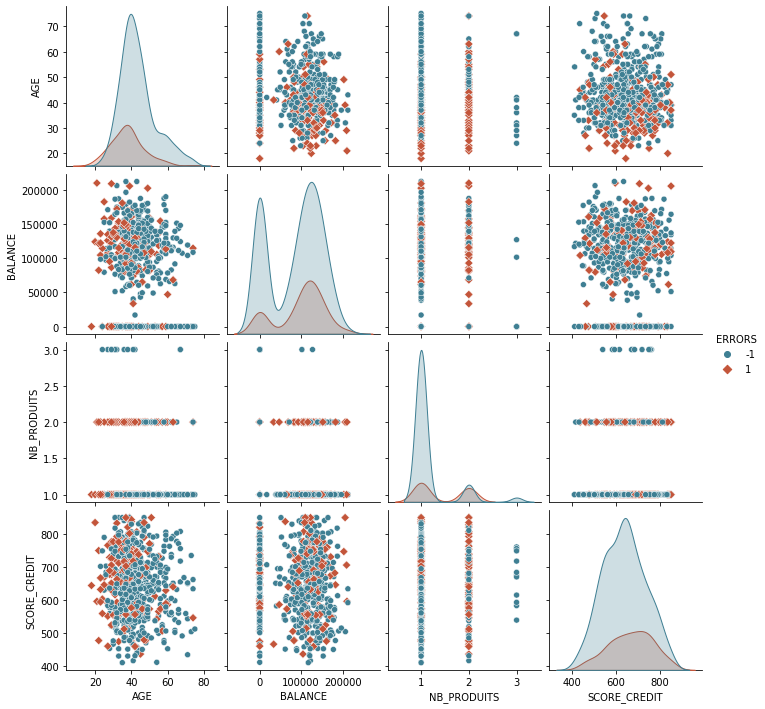

In [21]:
from matplotlib.cm import register_cmap
from matplotlib.colors import ListedColormap

#pal = sns.diverging_palette(220, 20, n=3)
sns.pairplot(X_test, hue="ERRORS",kind='scatter', markers=["o",".","D"])
pal = sns.diverging_palette(220, 20, n=2)
sns.pairplot(X_test[X_test["ERRORS"]!=0], hue="ERRORS",kind='scatter', markers=["o","D"], palette=pal)


In [22]:
plot_boxplot_comparisons(X_test, hue="ERRORS")

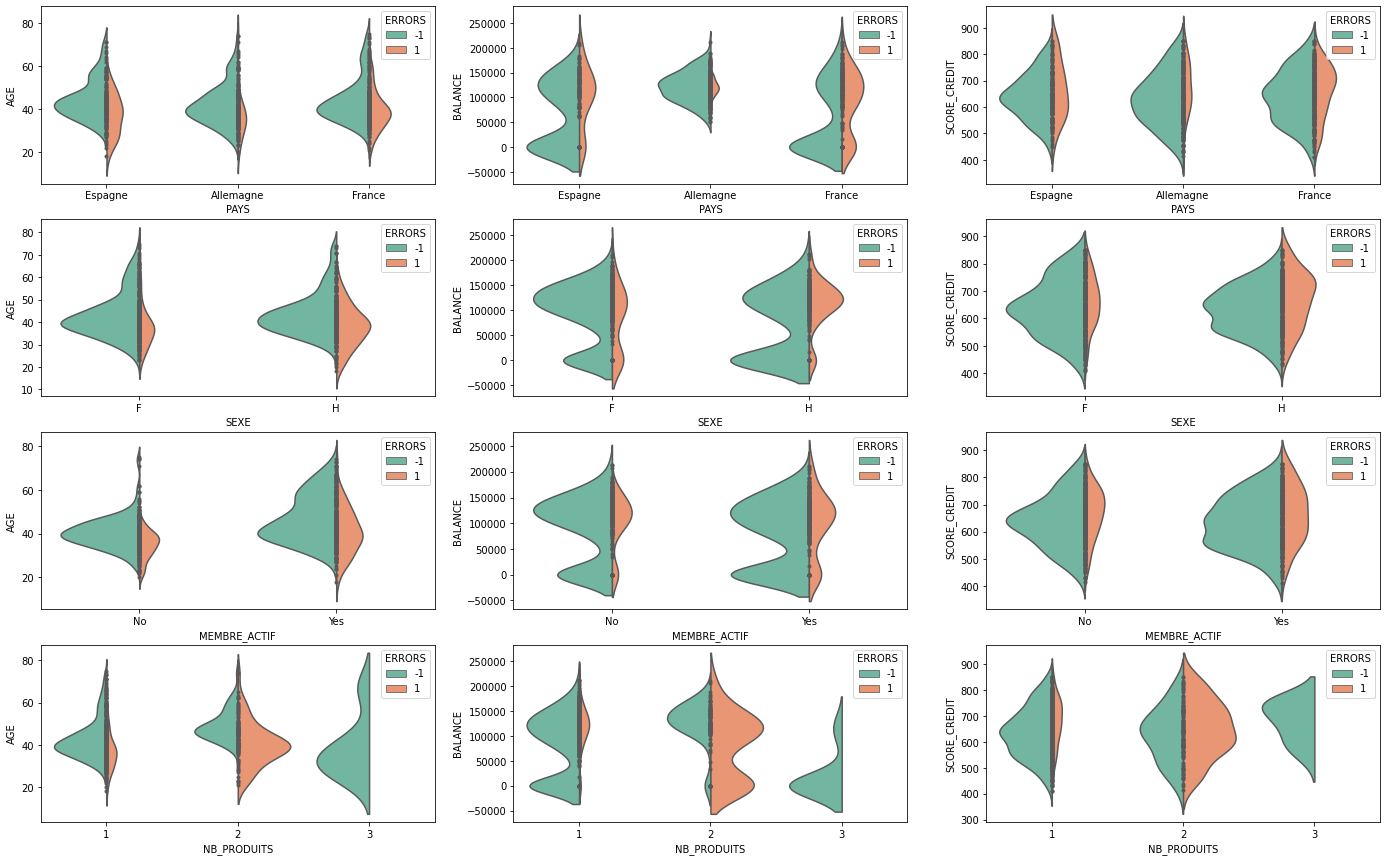

In [23]:
plot_violinplot_comparisons(X_test[X_test["ERRORS"].isin([-1, 1])], hue="ERRORS")

In [ ]:

 Class count
count_class_0, count_class_1 = df_train[target].value_counts()

# Divide by class
df_class_0 = df_train[df_train[target] == 0]
df_class_1 = df_train[df_train[target] == 1]

# Oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over[target].value_counts())

df_train_over[target].value_counts().plot(kind='bar', title='Count (target)');
X_train = df_train_over[selected_features]
y_train = df_train_over[target]